## 자동차 리콜 3개년 분석

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

[받은 파일]
- 2020년:자동차리콜현황(2020) v3.0.csv
- 2021년:자동차리콜현황(2021).csv
- 2022년:한국교통안전공단_자동차결함 리콜현황_20221231.csv

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

#폰트파일위치 지정해서 설정
font_path = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()

#폰트 설정
plt.rc('font', family=font_name)

# 마이너스 깨짐 현상 해결
plt.rcParams['axes.unicode_minus'] = False

# matplotlib 폰트 패밀리 출력
plt.rcParams['font.family']

['NanumGothic']

In [24]:
#데이터 로드

df = pd.read_csv('./data/한국교통안전공단_자동차결함 리콜현황_20221231.csv',encoding='euc_kr')


In [25]:
# 데이터 병합

df.head()


,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."


In [26]:
# 데이터 중복 여부 및 개수 확인

df[df.duplicated(keep=False)]

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
303,대전기계공업(주),W800,2019-02-21,2022-02-10,2022-03-28,경음기에 전기 배선을 연결하는 단자의 내구성 부족으로 주행 중 특정한 엔진 회전 영...
304,대전기계공업(주),W800,2019-02-21,2022-02-10,2022-03-28,경음기에 전기 배선을 연결하는 단자의 내구성 부족으로 주행 중 특정한 엔진 회전 영...
392,메르세데스벤츠코리아(주),A 220,2021-09-16,2021-09-16,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...
393,메르세데스벤츠코리아(주),A 220,2021-09-16,2021-09-16,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...
527,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-05-02,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
528,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-05-02,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
1144,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1145,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1216,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
1217,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."


In [27]:
# 데이터 중복 처리(삭제)

df = df.drop_duplicates()


## 1. 제조사별 리콜 현황
* 3년동안 리콜 건수가 가장 많은 제조사는?
* 시각화를 통해 근거 자료 만들기

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1414 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       1414 non-null   object
 1   차명        1414 non-null   object
 2   생산기간(부터)  1414 non-null   object
 3   생산기간(까지)  1414 non-null   object
 4   리콜개시일     1414 non-null   object
 5   리콜사유      1414 non-null   object
dtypes: object(6)
memory usage: 77.3+ KB


In [29]:
df.groupby('제작자').count()

,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
제작자,,,,,
(유)기흥모터스,21,21,21,21,21
(주) 바이크코리아,3,3,3,3,3
(주) 한국모터트레이딩,3,3,3,3,3
(주)다산중공업,2,2,2,2,2
(주)볼보자동차코리아,13,13,13,13,13
(주)스포츠모터사이클코리아,1,1,1,1,1
(주)에프엠케이,31,31,31,31,31
(주)재규어랜드로버코리아,24,24,24,24,24
(주)피라인,5,5,5,5,5


In [30]:
car = df.groupby('제작자').size().sort_values(ascending=False).to_frame('count')
car.head()

,count
제작자,
비엠더블유코리아(주),432
메르세데스벤츠코리아(주),329
폭스바겐그룹코리아 주식회사,216
현대자동차(주),61
만트럭버스코리아(주),41


In [31]:
### EDA SWEETWIZ 사용 연습 필요
# import pandas as pd
# import sweetviz as sv
# # 경고메세지 끄기
# import warnings
# warnings.filterwarnings(action='ignore')

# df_car = pd.read_csv('./data/한국교통안전공단_자동차결함 리콜현황_20221231.csv')

# my_report = sv.analyze(df_car)
# # my_report.show_notebook(layout='widescreen',scale=0.8) #notebook, colab에서 표시하기
# my_report.show_html(r'./image/sweet_report.html')

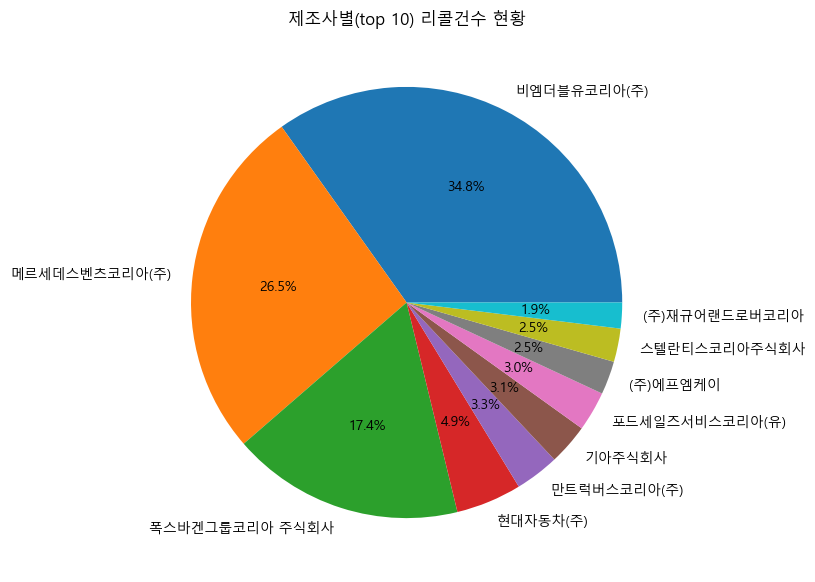

In [41]:
car = df.groupby('제작자').size().sort_values(ascending=False).to_frame('count').head(10)

x = car.index
y = car['count']

plt.figure(figsize=(12,7))   #스케치북 그리고
plt.pie(y,labels=x,autopct='%.1f%%')
plt.title('제조사별(top 10) 리콜건수 현황') # 차트 제목 쓰고
plt.show()   

```
문제: 3년동안 리콜건수가 가장 많은 제조사는?
답: 비엠더블유코리아(주)
```

## 2.(그나마) 튼튼하게 만드는 기업 vs  Worst 기업 top10

* 출고 년도부터 리콜 개시일 사이의 기간을 사용기간이라고 할때, 
* 이 사용기간이 길면 길수록 그나마 튼튼하게 만들었다고 볼 수 있다. 
* 물론, 여기 리콜현황에 등록되지 않은 제조사가 베스트이겠지만....
* 사용기간의 평균이 가장 높고 낮은 10개 기업 리스트를 알아보자

In [62]:
# 사용기간 컬럼 새로 만들기(파생변수 생성해서)
df['생산기간(부터)'] = pd.to_datetime(df['생산기간(부터)'])
a = df['생산_년']=df['생산기간(부터)'].dt.year
df['리콜개시일'] = pd.to_datetime(df['리콜개시일'])
b = df['리콜_년']=df['리콜개시일'].dt.year

usedtime = b - a
usedtime

df['usedtime'] = df['리콜_년'] - df['생산_년']


In [65]:
# 제조사별 사용기간이 가장 긴 순서대로 정렬
result = df.groupby('제작자')['usedtime'].mean().sort_values(ascending=False)
print(result)

제작자
한신특장                9.000000
비엠더블유코리아(주)         6.752315
(주)에프엠케이            6.516129
유한회사 모토로싸           6.000000
(주)다산중공업            6.000000
화창상사(주)             5.562500
기아주식회사              4.368421
스텔란티스코리아주식회사        4.096774
모토스타코리아(주)          4.000000
포드세일즈서비스코리아(유)      3.702703
메르세데스벤츠코리아(주)       3.431611
(주)볼보자동차코리아         3.384615
(주)피라인              3.200000
기흥인터내셔널 유한회사        3.000000
대전기계공업(주)           3.000000
혼다코리아(주)            2.866667
르노코리아자동차 주식회사       2.857143
현대자동차(주)            2.622951
테슬라코리아 유한회사         2.550000
만트럭버스코리아(주)         2.463415
폭스바겐그룹코리아 주식회사      2.300926
폴스타오토모티브코리아 유한회사    2.000000
(주)스포츠모터사이클코리아      2.000000
(주) 한국모터트레이딩        2.000000
주식회사 마이브            2.000000
(유)기흥모터스            1.904762
다임러트럭코리아(주)         1.777778
포르쉐코리아 주식회사         1.700000
범한자동차 주식회사          1.500000
(주)재규어랜드로버코리아       1.375000
한국토요타자동차(주)         1.200000
스카니아코리아그룹(주)        1.000000
(주) 바이크코리아          1.000000
볼보트럭코리아(주)          1.000000
지엠코리아(주)  

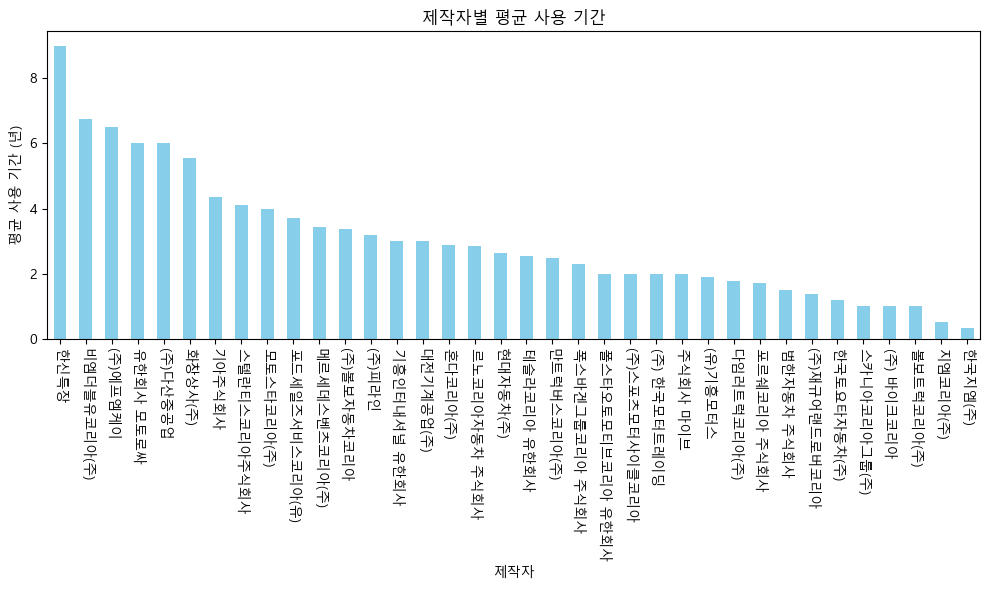

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

result = df.groupby('제작자')['usedtime'].mean().sort_values(ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 지정
result.plot(kind='bar', color='skyblue')
plt.title('제작자별 평균 사용 기간')
plt.ylabel('평균 사용 기간 (년)')
plt.xlabel('제작자')
plt.xticks(rotation=270)  # x축 레이블 회전
plt.tight_layout()  # 그래프 레이아웃 조정
plt.show()

```
문제:그나마 튼튼 제조사 top 3는?
답: 한산특장, 비엠더블유코리아(주), (주)에프엠케이
```

## 3. 리콜이 가장 많은 제조사 1위의 리콜 원인은 ?
* 리콜 대마왕 XXX 기업의 문제의 모델 xxx에 대해 대규모 손해배상청구 소송을 진행하려 한다. 
* 이 회사의 주요 리콜 사유를 알아내고,(워드 클라우드로 제작해서 키워드 추출)
* 해당 사유로 리콜된 최고 문제 모델을 찾아내서
* 소송으로 가즈아~

In [69]:
# 리콜건수가 가장 많은 제조사는?
car = df.groupby('제작자').size().sort_values(ascending=False).to_frame('count')
car.head()

,count
제작자,
비엠더블유코리아(주),432
메르세데스벤츠코리아(주),329
폭스바겐그룹코리아 주식회사,216
현대자동차(주),61
만트럭버스코리아(주),41


```
A. 비엠더블유코리아(주)
```

In [70]:
# 리콜 사유는?
df['리콜사유'].drop_duplicates().values


array(['제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되지 않아 라디에이터 내부 압력을 일정하게 유지할 수 없습니다. 이로 인해 라디에이터 내부 압력이 높아지면 냉각수 저장 탱크의 오버플로 튜브에서 냉각수가 분출될 수 있습니다.',
       '특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 내 오일 압력 생성기(어큐뮬레이터)의 나사산이 날카롭게 가공되어, 사용 기간 중 어큐뮬레이터 하우징에 미세 균열이 발생하여 충분한 변속 압력 생성에 지장을 줄 가능성이 있습니다.',
       '크랭크샤프트의 내구성 부족으로 인해 엔진 부하가 높을 경우 크랭크샤프트가 파손될 수 있습니다.',
       '연료탱크 압력 센서의 고정 클립이 내식성 부족으로 장기간 운행 시 고정 클립이 부식될 수 있고, 고정력이 상실되어 연료 탱크 압력 센서가 헐거워질 수도 있습니다.',
       '일부 대상 차량의 엔진컨트롤유닛 소프트웨어 오류로 EGR(배기가스 재순환 장치) 배관 내 온도가 상승할 수 있습니다. 또한 EGR 쿨러 (배기가스 재순환 냉각기)의 내구성 부족에 의한 미세 균열로 냉각수가 누수 될 수 있습니다.',
       'BMW 자체 품질 조사 결과 2021년 11월 22일부터 2021년 11월 30일까지 제작된 BMW i4 eDrive40, i4 M50 차량 72대의 차량 생산 과정에서 고전압 배터리 충격 완화 패드*가 장착되지 않았을 가능성을 확인하였습니다. *고전압 배터리 충격 완화 패드: 배터리와 차대 사이에 장착되어 측면 충돌 시 차대가 고전압 배터리에 손상을 입히는 것을 최소화하는 장치',
       '엔진 컨트롤 유닛의 소프트웨어 오류로 인해 엔진 시동 후 차량 도난방지 장치(vehicle immobilizer)의 데이터를 엔진 컨트롤 유닛에 저장하지 못할 수 있습니다.',
       '파워트레인 컨트롤 유닛의 소프트웨어 오류로 인해 차량 운행 중 파워트레인 컨트롤 유닛이 의

In [71]:
text = ' '.join(df['리콜사유'].values)

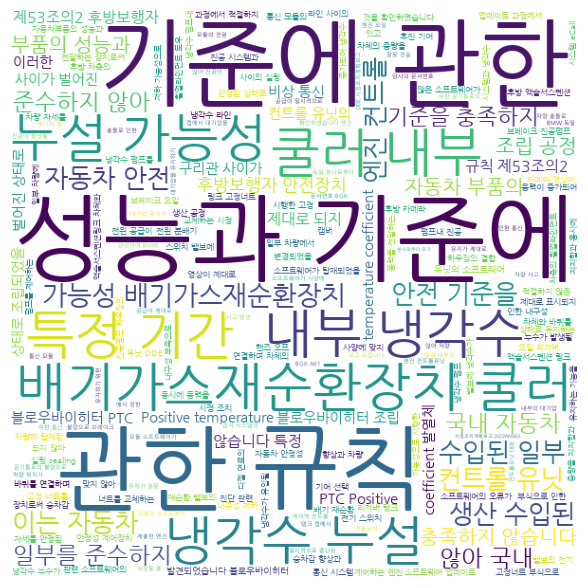

In [77]:
# 워드클라우드를 사용해 키워드 추출
text = ' '.join(df['리콜사유'].values)

from wordcloud import WordCloud, STOPWORDS

spwords = set(STOPWORDS) | set([
    '되었습니다', '발견', '되었습니다.', "수이기는", "적은 수이기는", "동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", 
    "될", "이", "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당", "있어", "내에",
    "못", "으로", "의한", "위해", '후', '할', '로', '더', '와', '나', '전', '매우', '등', '내에', '을', '함'
])

caselist = df['리콜사유'].values
text = ' '.join(caselist)

font_path = './NanumGothic.ttf'
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path=font_path,
                background_color='white', width=600, height=600)

wc1.generate(text)

plt.figure(figsize=(6, 6))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()


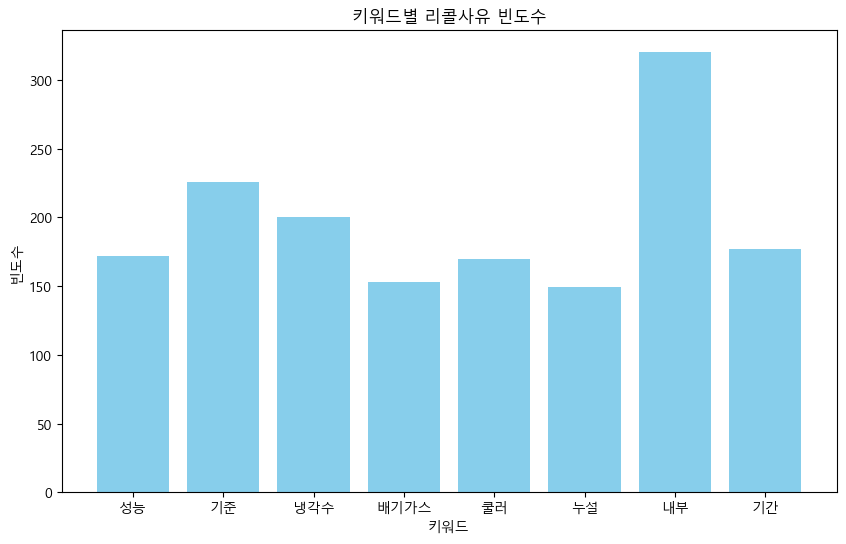

In [83]:
# 주요 원인이 포함된 이유 상세 보기
import matplotlib.pyplot as plt

# 주요 키워드 목록 (예시)
keywords = ["성능", "기준", "냉각수", "배기가스", "쿨러", "누설", "내부", "기간"]

# 각 키워드별 빈도수 계산
frequencies = [df['리콜사유'].str.contains(keyword, na=False).sum() for keyword in keywords]

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(keywords, frequencies, color='skyblue')
plt.title("키워드별 리콜사유 빈도수")
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.show()

In [82]:
#주요 원인으로 리콜된 가장 나쁜 모델3개는?
model_freq = {}

# 키워드별로 df를 필터링하고, 해당 모델들의 빈도를 계산
for keyword in keywords:
    filtered_df = df[df['리콜사유'].str.contains(keyword, na=False)]
    for model in filtered_df['차명'].unique():
        if model in model_freq:
            model_freq[model] += 1
        else:
            model_freq[model] = 1

# 모델 빈도수를 기준으로 내림차순 정렬
sorted_models = sorted(model_freq.items(), key=lambda x: x[1], reverse=True)

# 결과 출력 (모델명과 빈도)
for model, freq in sorted_models:
    print(f"{model}: {freq}")

X4 xDrive20d xLine: 5
X3 xDrive20d M Sport Package: 5
520d xDrive: 5
520d: 5
420d xDrive Gran Coupe: 5
420d xDrive Coupe: 5
320d Touring: 5
320d Gran Turismo xDrive: 5
320d Gran Turismo: 5
320d EfficientDynamics Edition: 5
320d: 5
220d Coupe: 5
120d: 5
118d: 5
320d xDrive: 5
320d xDrive Gran Turismo: 5
420d Coupe: 5
420d Gran Coupe: 5
X6 xDrive40d: 5
X6 xDrive30d: 5
X5 xDrive40d: 5
X5 xDrive30d: 5
X5 xDrive: 5
X4 xDrive30d: 5
X3 xDrive30d: 5
X3 xDrive: 5
GT 30d xDrive: 5
Gran Turismo 30d: 5
730Ld: 5
730d: 5
535d: 5
525d: 5
520d Touring: 5
X4 xDrive20d: 5
X3 xDrive20d: 5
X3 sDrive: 5
X6 M50d: 5
X5 xDrive30d xLine: 5
X3 xDrive35d: 5
GT 30d: 5
GT 20d: 5
Gran Turismo EfficientDynamics Edition: 5
Gran Turismo 30d xDrive: 5
740Ld xDrive: 5
740d xDrive: 5
740d: 5
730Ld xDrive: 5
730d xDrive: 5
640d xDrive Gran Coupe: 5
530d xDrive: 5
530d: 5
525d xDrive Touring: 5
525d xDrive: 5
518d: 5
435d xDrive Gran Coupe: 5
328d: 5
325d: 5
320d ED: 5
1 Series Sport: 5
X7 xDrive30d Design Pure Excellence:

In [84]:
# 각 모델에 대한 키워드 중복 빈도를 저장할 빈 딕셔너리 생성
model_overlap_freq = {}

# 모든 모델에 대하여
for model in df['차명'].unique():
    overlap_count = 0
    model_specific_df = df[df['차명'] == model]
    
    # 각 키워드에 대하여, 해당 키워드가 '리콜사유'에 얼마나 많이 중복되는지 확인
    for keyword in keywords:
        overlap_count += model_specific_df['리콜사유'].str.contains(keyword, na=False).sum()
    
    # 최종 중복 횟수를 딕셔너리에 저장
    model_overlap_freq[model] = overlap_count

# 중복 빈도를 기준으로 내림차순 정렬
sorted_models_by_overlap = sorted(model_overlap_freq.items(), key=lambda x: x[1], reverse=True)

# 상위 3개의 모델 출력
for i, (model, freq) in enumerate(sorted_models_by_overlap[:3]):
    print(f"{i+1}. {model}: {freq} times")

1. 520d: 40 times
2. 520d xDrive: 35 times
3. 420d xDrive Gran Coupe: 25 times


```
리콜 주요 원인은? => 냉각수, 배기가스, 쿨러같은 자동차 내부 요소의 성능 기준 및 검사 기간 미충족

그래서, 가장 나쁜 모델은? => 비엠더블유코리아(주)의 520d, 520d xDrive, 420d xDrive Gran Coupe

```